In [85]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, f1_score, cohen_kappa_score

In [86]:
data = pd.read_csv("../data/clean.csv")
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,Pre-HSgrad,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,198693,Pre-HSgrad,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,27,Private,257302,Assoc,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
45218,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
45219,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
45220,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [87]:
# Build X and y
y = data['income']
X = data.drop(['income'], axis=1)

In [88]:
# split train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
# split numericals and categoricals
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df  = pd.DataFrame(X_test,  columns=X.columns)

X_train_num = X_train_df.select_dtypes(include = np.number)
X_test_num  = X_test_df.select_dtypes(include = np.number)
X_train_cat = X_train_df.select_dtypes(['object'])
X_test_cat  = X_test_df.select_dtypes(['object'])

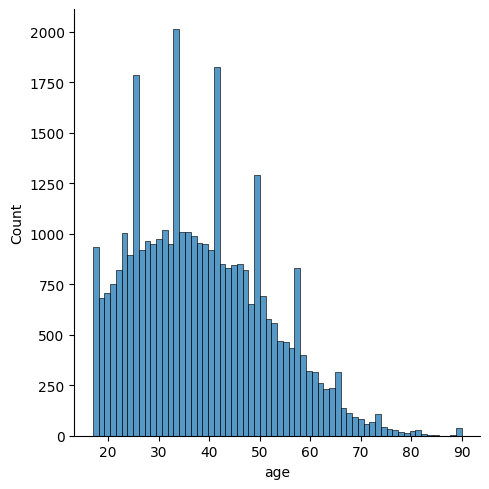

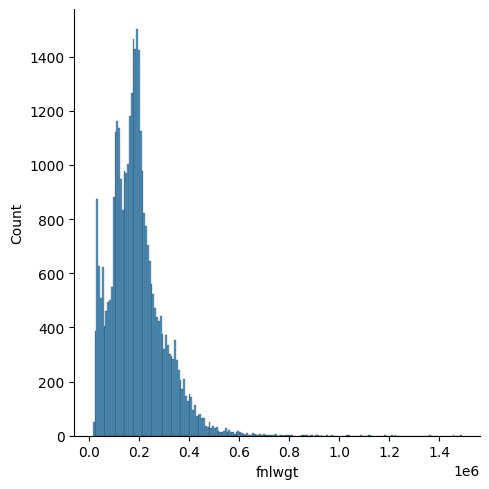

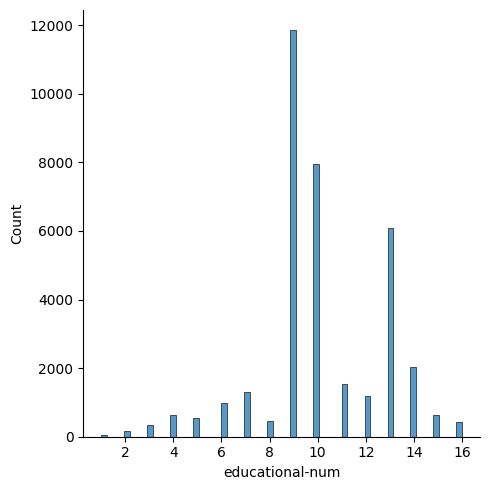

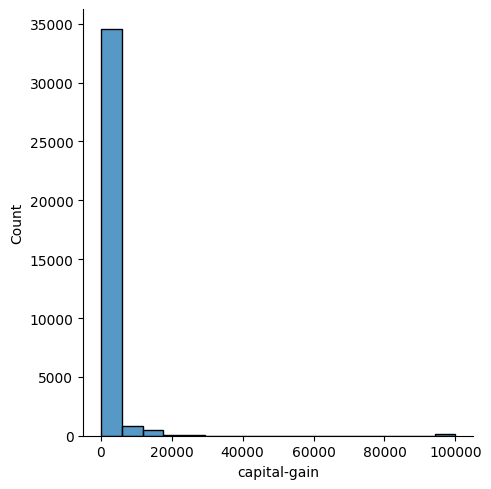

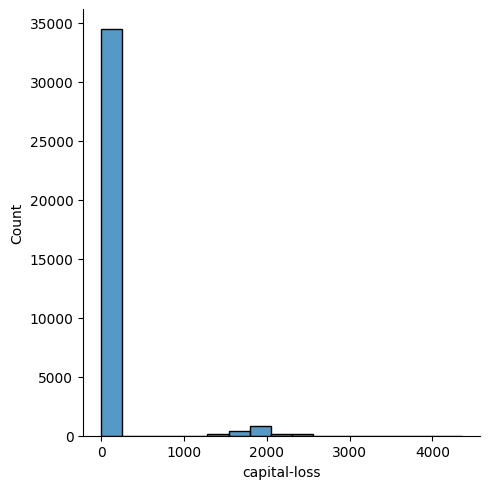

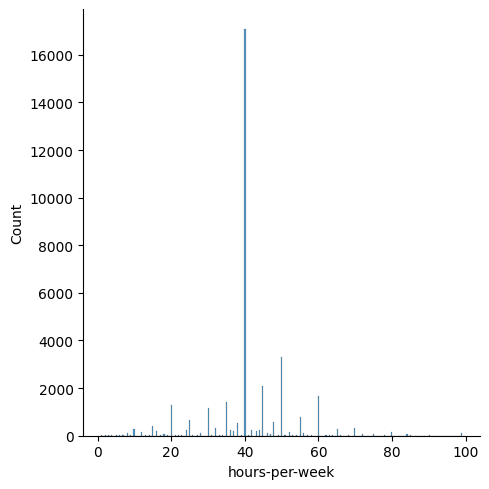

In [90]:
# plot distributions for numericals
sns.displot(X_train_num['age'])
plt.show()

sns.displot(X_train_num['fnlwgt'])
plt.show()

sns.displot(X_train_num['educational-num'])
plt.show()

sns.displot(X_train_num['capital-gain'])
plt.show()

sns.displot(X_train_num['capital-loss'])
plt.show()

sns.displot(X_train_num['hours-per-week'])
plt.show()

In [91]:
from sklearn.preprocessing import PowerTransformer


# Transforming distribtutions
transformer = PowerTransformer()
transformer.fit(X_train_num)
X_train_scaled = transformer.transform(X_train_num)
X_test_scaled  = transformer.transform(X_test_num)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_num.columns)
X_test_scaled  = pd.DataFrame(X_test_scaled,  columns=X_test_num.columns)
X_train_scaled.head()
#sns.displot(X_train_num)
#plt.show()
# after the fit.
# Save your scaler with pickle.



,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,-0.670522,0.799631,1.156495,-0.303593,-0.223422,-0.071225
1,0.165596,-0.857281,1.156495,-0.303593,-0.223422,0.756949
2,0.312181,0.587641,1.156495,-0.303593,-0.223422,-2.192907
3,-1.520201,-0.723412,-0.094784,-0.303593,-0.223422,-2.192907
4,1.373498,0.320248,-0.487806,-0.303593,-0.223422,0.756949


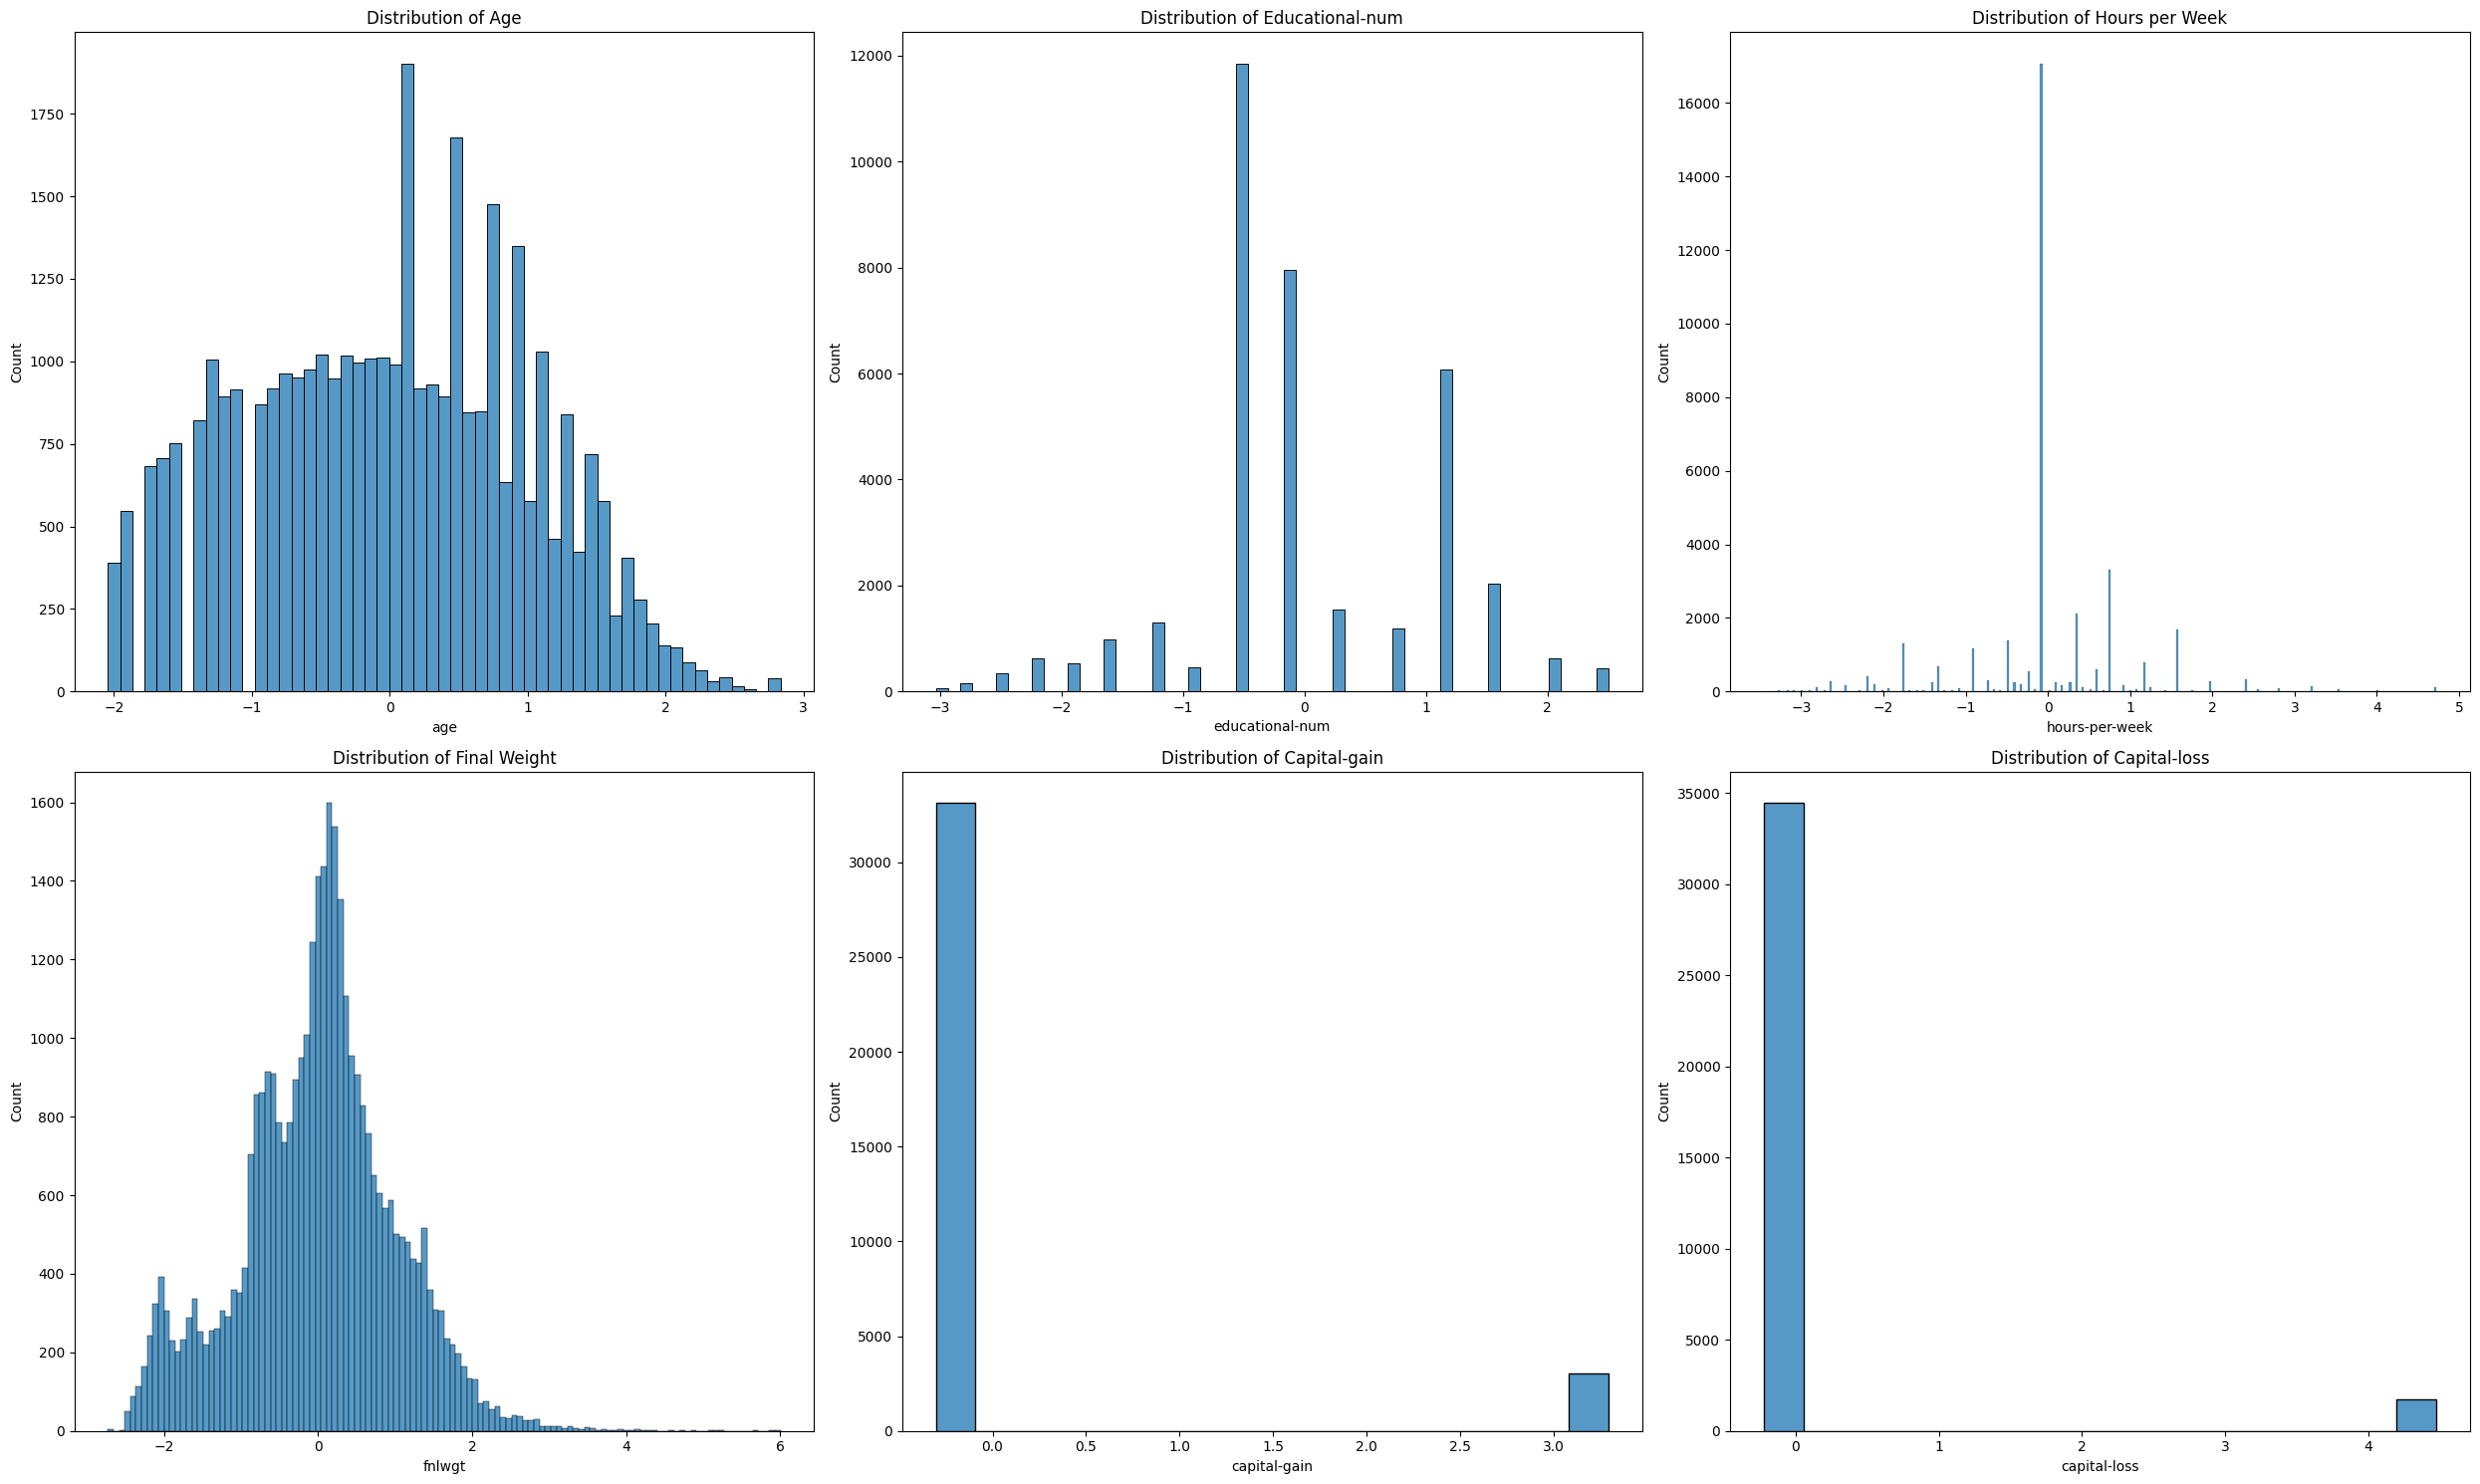

In [92]:
fig, ax = plt.subplots(2,3,figsize=(25,15))

sns.histplot(X_train_scaled['age'],ax = ax[0,0])
ax[0,0].set_title("Distribution of Age")

sns.histplot(X_train_scaled['fnlwgt'],ax = ax[1,0])
ax[1,0].set_title("Distribution of Final Weight")

sns.histplot(X_train_scaled['educational-num'],ax = ax[0,1])
ax[0,1].set_title("Distribution of Educational-num")

sns.histplot(X_train_scaled['capital-gain'],ax = ax[1,1])
ax[1,1].set_title("Distribution of Capital-gain")

sns.histplot(X_train_scaled['capital-loss'],ax = ax[1,2])
ax[1,2].set_title("Distribution of Capital-loss")

sns.histplot(X_train_scaled['hours-per-week'],ax = ax[0,2])
ax[0,2].set_title("Distribution of Hours per Week")

plt.tight_layout()
plt.savefig("../Images/num-scaled.png")
plt.show()

In [93]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first') 
encoder.fit(X_train_cat)
# save the encoder
X_train_cat_encoded = encoder.transform(X_train_cat).toarray()
cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)
X_train_encoded_df = pd.DataFrame(X_train_cat_encoded, columns=cols)
X_train_encoded_df.head()

,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_Bachelors,education_HS-grad,education_Post-grad,education_Pre-HSgrad,...,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Male,native-country_Germany,native-country_Mexico,native-country_Philippines,native-country_United-States,native-country_other
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [94]:
X_train_treated_df = pd.concat([X_train_scaled, X_train_encoded_df], axis=1)
X_train_treated_df

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Male,native-country_Germany,native-country_Mexico,native-country_Philippines,native-country_United-States,native-country_other
0,-0.670522,0.799631,1.156495,-0.303593,-0.223422,-0.071225,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.165596,-0.857281,1.156495,-0.303593,-0.223422,0.756949,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.312181,0.587641,1.156495,-0.303593,-0.223422,-2.192907,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-1.520201,-0.723412,-0.094784,-0.303593,-0.223422,-2.192907,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.373498,0.320248,-0.487806,-0.303593,-0.223422,0.756949,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36172,0.165596,2.293233,-1.583106,-0.303593,-0.223422,-0.071225,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
36173,-0.065713,-0.652070,1.595628,-0.303593,-0.223422,0.756949,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
36174,1.090057,-1.929931,-1.916379,-0.303593,-0.223422,-0.071225,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
36175,1.318395,0.132877,0.310722,-0.303593,-0.223422,-0.071225,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [95]:
X_train_treated_df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Male,native-country_Germany,native-country_Mexico,native-country_Philippines,native-country_United-States,native-country_other
count,3.617700e+04,3.617700e+04,3.617700e+04,3.617700e+04,3.617700e+04,3.617700e+04,36177.000000,36177.000000,36177.000000,36177.00000,...,36177.000000,36177.000000,36177.000000,36177.000000,36177.000000,36177.000000,36177.000000,36177.000000,36177.000000,36177.000000
mean,-6.249681e-16,-3.748925e-16,5.735094e-16,-5.892219e-18,5.735094e-17,-1.865869e-17,0.069271,0.736435,0.036570,0.08287,...,0.029439,0.093844,0.007546,0.859773,0.674600,0.004229,0.019101,0.006192,0.912818,0.053846
std,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,0.253917,0.440572,0.187707,0.27569,...,0.169035,0.291616,0.086542,0.347227,0.468531,0.064896,0.136880,0.078445,0.282106,0.225717
min,-2.042803e+00,-2.730531e+00,-3.033654e+00,-3.035932e-01,-2.234218e-01,-3.454159e+00,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.659546e-01,-6.183867e-01,-4.878056e-01,-3.035932e-01,-2.234218e-01,-7.122491e-02,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.300983e-02,5.080124e-02,-9.478389e-02,-3.035932e-01,-2.234218e-01,-7.122491e-02,0.000000,1.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,7.206726e-01,5.874417e-01,1.156495e+00,-3.035932e-01,-2.234218e-01,3.439379e-01,0.000000,1.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,2.834396e+00,6.004007e+00,2.504011e+00,3.293948e+00,4.475840e+00,4.723394e+00,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [96]:
from sklearn.linear_model import LogisticRegression

classification = LogisticRegression(random_state=0, solver='saga',
                  multi_class='ovr')

classification.fit(X_train_treated_df, y_train)
# save the model with pickle

LogisticRegression(multi_class='ovr', random_state=0, solver='saga')

In [97]:
X_test_scaled.head()


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,-1.771003,-2.135740,-1.583106,-0.303593,-0.223422,-0.071225
1,0.589303,-2.251241,-0.487806,-0.303593,-0.223422,-0.071225
2,0.720673,1.923406,0.310722,-0.303593,-0.223422,-0.071225
3,-1.287069,-1.771219,-0.094784,-0.303593,-0.223422,-0.071225
4,1.090057,0.030952,-0.487806,-0.303593,-0.223422,-0.071225


In [98]:
encoded_test_cat = encoder.transform(X_test_cat).toarray()
onehot_encoded_test_df = pd.DataFrame(encoded_test_cat, columns=cols)
onehot_encoded_test_df.head()

,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_Bachelors,education_HS-grad,education_Post-grad,education_Pre-HSgrad,...,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Male,native-country_Germany,native-country_Mexico,native-country_Philippines,native-country_United-States,native-country_other
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [99]:
X_test_treated_df = pd.concat([X_test_scaled, onehot_encoded_test_df], axis=1)

In [100]:
y_train_pred = classification.predict(X_train_treated_df)
y_test_pred  = classification.predict(X_test_treated_df)
print("The first predictions on the TRAIN set are: ",y_train_pred[:5])
print("The first predictions on the TEST set are: ",y_test_pred[:5])

The first predictions on the TRAIN set are:  ['<=50K' '>50K' '>50K' '<=50K' '<=50K']
The first predictions on the TEST set are:  ['<=50K' '<=50K' '<=50K' '<=50K' '<=50K']


In [101]:
print("The confusion matrix on the TRAIN set is: ")
cm_train = confusion_matrix(y_train, y_train_pred)
cm_train

The confusion matrix on the TRAIN set is: 


array([[25049,  2123],
       [ 3642,  5363]], dtype=int64)

The confusion matrix on the TRAIN set is: 
[[25049  2123]
 [ 3642  5363]]


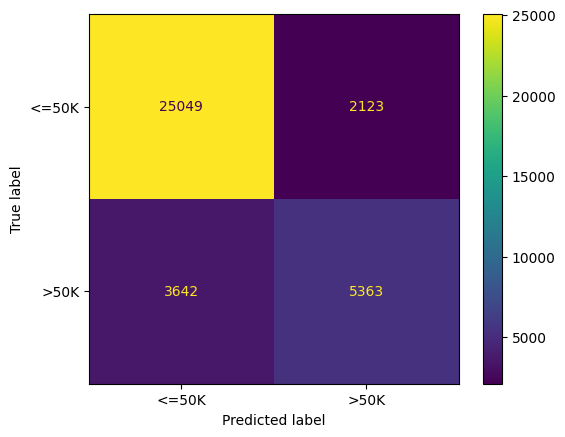

In [102]:
print("The confusion matrix on the TRAIN set is: ")
cm_train = confusion_matrix(y_train, y_train_pred)
print(cm_train)
disp = ConfusionMatrixDisplay(cm_train,display_labels=classification.classes_);
disp.plot()
plt.savefig("../Images/cm-train.png")
plt.show()

The confusion matrix on the TEST set is: 
[[6339  503]
 [ 904 1299]]


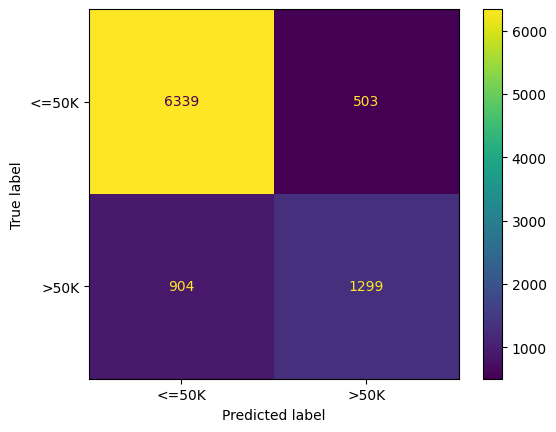

In [103]:
print("The confusion matrix on the TEST set is: ")
cm_test = confusion_matrix(y_test, y_test_pred)
print(cm_test)
disp = ConfusionMatrixDisplay(cm_test,display_labels=classification.classes_);
disp.plot()
plt.savefig("../Images/cm-test.png")
plt.show()

In [104]:
y_train.value_counts()

income
<=50K    27172
>50K      9005
Name: count, dtype: int64

In [105]:
# classification.score == accuracy of prediction
# Accuracy score = (TP + TN)/(TP + TN + FP + FN)
print("The accuracy in the TRAIN set is: {:.2f}".format(accuracy_score(y_train, y_train_pred)))
print("The accuracy in the TEST  set is: {:.2f}".format(accuracy_score(y_test, y_test_pred)))

The accuracy in the TRAIN set is: 0.84
The accuracy in the TEST  set is: 0.84


In [106]:
# Precission score. = TP/(TP + FP)
#If we're using labels instead of numbers for the classes to predict, we need to
# provide what class is the "positive" and which is the "negative"
print("The precission in the TRAIN set is: {:.2f}".format(precision_score(y_train, y_train_pred, pos_label="<=50K")))
print("The precission in the TEST  set is: {:.2f}".format(precision_score(y_test, y_test_pred, pos_label="<=50K")))

The precission in the TRAIN set is: 0.87
The precission in the TEST  set is: 0.88


In [107]:
# Recall score = TP / ( TP + FN)
print("The recall in the TRAIN set is: {:.2f}".format(recall_score(y_train, y_train_pred, pos_label="<=50K")))
print("The recall in the TEST  set is: {:.2f}".format(recall_score(y_test,  y_test_pred, pos_label="<=50K")))

The recall in the TRAIN set is: 0.92
The recall in the TEST  set is: 0.93


In [108]:
print("The F1-score for the TRAIN set is {:.2f}".format(f1_score(y_train,y_train_pred, pos_label="<=50K")))

The F1-score for the TRAIN set is 0.90


In [109]:
print("The F1-score for the TEST set is {:.2f}".format(f1_score(y_test,y_test_pred, pos_label="<=50K")))

The F1-score for the TEST set is 0.90


In [110]:
print(classification_report(y_train, y_train_pred,target_names=['<=50K','>50K']))

              precision    recall  f1-score   support

       <=50K       0.87      0.92      0.90     27172
        >50K       0.72      0.60      0.65      9005

    accuracy                           0.84     36177
   macro avg       0.79      0.76      0.77     36177
weighted avg       0.83      0.84      0.84     36177



In [111]:
print(classification_report(y_test, y_test_pred,target_names=['<=50K','>50K']))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      6842
        >50K       0.72      0.59      0.65      2203

    accuracy                           0.84      9045
   macro avg       0.80      0.76      0.77      9045
weighted avg       0.84      0.84      0.84      9045



In [112]:
from sklearn.metrics import cohen_kappa_score

In [113]:
cohen_kappa_score(y_train, y_train_pred)

0.548347704554754

In [114]:
cohen_kappa_score(y_test, y_test_pred)

0.5500781616435182

In [115]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

y_train_pred  = classification.predict(X_train_treated_df)

print("The accuracy in the TRAIN  set is: {:.2f}".format(accuracy_score(y_train, y_train_pred)))
print("The precission in the TRAIN  set is: {:.2f}".format(precision_score(y_train, y_train_pred, pos_label="<=50K")))
print("The recall in the TRAIN  set is: {:.2f}".format(recall_score(y_train,  y_train_pred, pos_label="<=50K")))
print("The F1-score for the TRAIN set is {:.2f}".format(f1_score(y_train,y_train_pred, pos_label="<=50K")))
print("The Kappa in the TRAIN set is: {:.2f}".format(cohen_kappa_score(y_train,y_train_pred)))

The accuracy in the TRAIN  set is: 0.84
The precission in the TRAIN  set is: 0.87
The recall in the TRAIN  set is: 0.92
The F1-score for the TRAIN set is 0.90
The Kappa in the TRAIN set is: 0.55


In [116]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

y_test_pred  = classification.predict(X_test_treated_df)

print("The accuracy in the TEST  set is: {:.2f}".format(accuracy_score(y_test, y_test_pred)))
print("The precission in the TEST  set is: {:.2f}".format(precision_score(y_test, y_test_pred, pos_label="<=50K")))
print("The recall in the TEST  set is: {:.2f}".format(recall_score(y_test,  y_test_pred, pos_label="<=50K")))
print("The F1-score for the TEST set is {:.2f}".format(f1_score(y_test,y_test_pred, pos_label="<=50K")))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_test_pred)))

The accuracy in the TEST  set is: 0.84
The precission in the TEST  set is: 0.88
The recall in the TEST  set is: 0.93
The F1-score for the TEST set is 0.90
The Kappa in the TEST set is: 0.55


income
<=50K    34014
>50K     11208
Name: count, dtype: int64


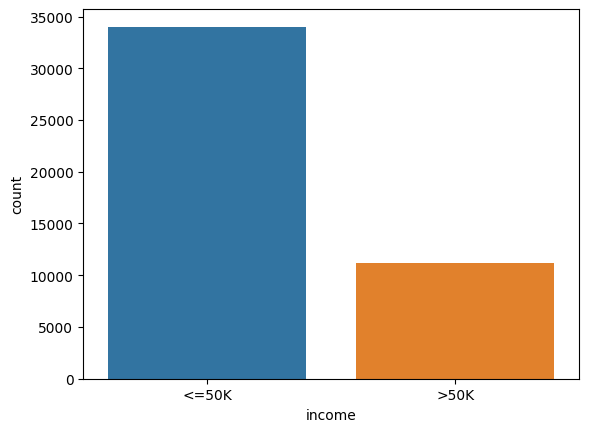

In [117]:
count_classes = data['income'].value_counts()
print(count_classes)
sns.countplot(x = 'income', data = data);
plt.savefig("../Images/IMB-Income.png")
plt.show()

In [118]:
print("The class imbalance ratio is: {:.2f}".format((count_classes[0]-count_classes[1])/(count_classes[0 ]+count_classes[1])))

The class imbalance ratio is: 0.50


In [119]:
#we fail to identify 40%+ of income classes!

In [120]:
from imblearn.combine import SMOTEENN
smoteenn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smoteenn.fit_resample(X_train_treated_df, y_train)

In [121]:
from sklearn.linear_model import LogisticRegression

classification2 = LogisticRegression(random_state=0, solver='saga',
                  multi_class='ovr')

classification2.fit(X_resampled, y_resampled)
y_resampled_pred = classification2.predict(X_resampled)
# save the model with pickle

print("The accuracy in the TRAIN  set is: {:.2f}".format(accuracy_score(y_resampled, y_resampled_pred)))
print("The precission in the TRAIN  set is: {:.2f}".format(precision_score(y_resampled,y_resampled_pred, pos_label="<=50K")))
print("The recall in the TRAIN  set is: {:.2f}".format(recall_score(y_resampled,  y_resampled_pred, pos_label="<=50K")))
print("The F1-score for the TRAIN set is {:.2f}".format(f1_score(y_resampled,y_resampled_pred, pos_label="<=50K")))
print("The Kappa in the TRAIN set is: {:.2f}".format(cohen_kappa_score(y_resampled,y_resampled_pred)))

The accuracy in the TRAIN  set is: 0.93
The precission in the TRAIN  set is: 0.93
The recall in the TRAIN  set is: 0.92
The F1-score for the TRAIN set is 0.93
The Kappa in the TRAIN set is: 0.86


The confusion matrix on the TRAIN set is: 
[[16987  1493]
 [ 1223 20164]]


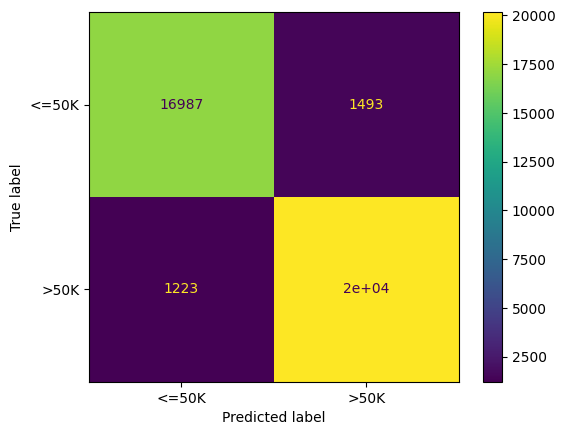

In [122]:
print("The confusion matrix on the TRAIN set is: ")
cm_train = confusion_matrix(y_resampled, y_resampled_pred)
print(cm_train)
disp = ConfusionMatrixDisplay(cm_train,display_labels=classification2.classes_);
disp.plot()
plt.savefig("../Images/IMB-cm-train.png")
plt.show()

In [123]:
from sklearn.linear_model import LogisticRegression

classification2 = LogisticRegression(random_state=0, solver='saga',
                  multi_class='ovr')

classification2.fit(X_resampled, y_resampled)
y_pred_test = classification2.predict(X_test_treated_df)
# save the model with pickle

print("The accuracy in the TEST  set is: {:.2f}".format(accuracy_score(y_test, y_test_pred)))
print("The precission in the TEST  set is: {:.2f}".format(precision_score(y_test, y_test_pred, pos_label="<=50K")))
print("The recall in the TEST  set is: {:.2f}".format(recall_score(y_test, y_test_pred, pos_label="<=50K")))
print("The F1-score for the TEST set is {:.2f}".format(f1_score(y_test, y_test_pred, pos_label="<=50K")))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test, y_test_pred)))

The accuracy in the TEST  set is: 0.84
The precission in the TEST  set is: 0.88
The recall in the TEST  set is: 0.93
The F1-score for the TEST set is 0.90
The Kappa in the TEST set is: 0.55


The confusion matrix on the TEST set is: 
[[6339  503]
 [ 904 1299]]


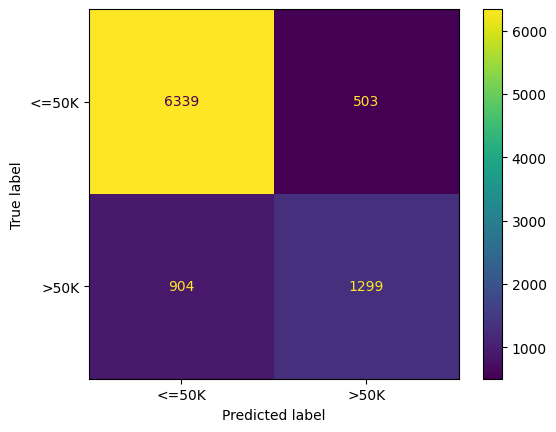

In [125]:
print("The confusion matrix on the TEST set is: ")
cm_test = confusion_matrix(y_test, y_test_pred)
print(cm_test)
disp = ConfusionMatrixDisplay(cm_test,display_labels=classification2.classes_);
disp.plot()
plt.savefig("../Images/IMB-cm-test.png")
plt.show()

In [126]:
X_train_treated_df.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Male,native-country_Germany,native-country_Mexico,native-country_Philippines,native-country_United-States,native-country_other
0,-0.670522,0.799631,1.156495,-0.303593,-0.223422,-0.071225,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.165596,-0.857281,1.156495,-0.303593,-0.223422,0.756949,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.312181,0.587641,1.156495,-0.303593,-0.223422,-2.192907,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-1.520201,-0.723412,-0.094784,-0.303593,-0.223422,-2.192907,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.373498,0.320248,-0.487806,-0.303593,-0.223422,0.756949,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [127]:
classification2.classes_

array(['<=50K', '>50K'], dtype=object)

In [128]:
classification2.predict(X_train_treated_df)

array(['<=50K', '>50K', '>50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [129]:
classification2.predict_proba(X_train_treated_df) # 1 -> <=50K, 0 -> >50K

array([[0.66069588, 0.33930412],
       [0.0097362 , 0.9902638 ],
       [0.05242328, 0.94757672],
       ...,
       [0.50008356, 0.49991644],
       [0.99632838, 0.00367162],
       [0.77611817, 0.22388183]])

In [130]:
importances = list(zip(list(np.abs(classification2.coef_[0])), list(classification2.coef_[0]),  list(X_resampled.columns)))
importances.sort(reverse=True)
importances

[(3.5093208310517294, 3.5093208310517294, 'marital-status_Married-civ-spouse'),
 (2.9264656588778566, 2.9264656588778566, 'marital-status_Married-AF-spouse'),
 (2.127590561255917, 2.127590561255917, 'relationship_Wife'),
 (2.016827863827831, -2.016827863827831, 'occupation_Farming-fishing'),
 (1.998557785379174, -1.998557785379174, 'workclass_State-gov'),
 (1.9442493463144637, -1.9442493463144637, 'occupation_Other-service'),
 (1.8158286347908545, -1.8158286347908545, 'workclass_Self-emp-not-inc'),
 (1.807994557580596, -1.807994557580596, 'occupation_Priv-house-serv'),
 (1.7279876323587813, 1.7279876323587813, 'education_Prof-school'),
 (1.593760484784705, -1.593760484784705, 'native-country_Mexico'),
 (1.3222588861430258, 1.3222588861430258, 'gender_Male'),
 (1.314355559095244, -1.314355559095244, 'occupation_Handlers-cleaners'),
 (1.2265210842940024, -1.2265210842940024, 'workclass_Local-gov'),
 (1.1713144046950805, 1.1713144046950805, 'educational-num'),
 (1.1184573105994842, 1.1184

In [131]:
from matplotlib import pyplot

In [132]:
importance = classification2.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))


Feature: 0, Score: 1.08018
Feature: 1, Score: 0.17220
Feature: 2, Score: 1.17131
Feature: 3, Score: 1.11846
Feature: 4, Score: 0.47854
Feature: 5, Score: 0.90910
Feature: 6, Score: -1.22652
Feature: 7, Score: -0.83174
Feature: 8, Score: -0.14726
Feature: 9, Score: -1.81583
Feature: 10, Score: -1.99856
Feature: 11, Score: -0.52308
Feature: 12, Score: 0.67278
Feature: 13, Score: 0.02724
Feature: 14, Score: 0.71587
Feature: 15, Score: -0.28259
Feature: 16, Score: 1.72799
Feature: 17, Score: 0.63628
Feature: 18, Score: 2.92647
Feature: 19, Score: 3.50932
Feature: 20, Score: -0.27012
Feature: 21, Score: -0.54844
Feature: 22, Score: -0.09829
Feature: 23, Score: -0.04809
Feature: 24, Score: -0.05183
Feature: 25, Score: -0.15008
Feature: 26, Score: 1.08811
Feature: 27, Score: -2.01683
Feature: 28, Score: -1.31436
Feature: 29, Score: -0.93806
Feature: 30, Score: -1.94425
Feature: 31, Score: -1.80799
Feature: 32, Score: 0.72661
Feature: 33, Score: 0.79176
Feature: 34, Score: 0.15970
Feature: 35,

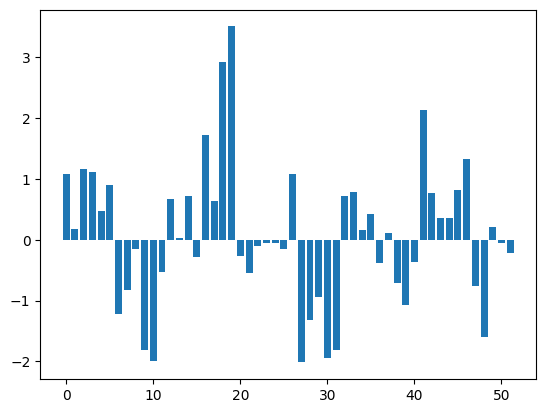

In [133]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [134]:
feature_names = X_resampled.columns
coefficients = classification2.coef_[0]

In [135]:
feature_names_list = feature_names.tolist()


In [136]:
df_importance = pd.DataFrame({'feature_names': feature_names_list, 'coefficients': coefficients})

In [137]:
df_importance.rename(columns={'coefficients': 'feature_importance'}, inplace=True)

In [138]:
df_importance.sort_values(by='feature_importance', ascending=False, inplace=True)


In [139]:
print(df_importance)

                           feature_names  feature_importance
19     marital-status_Married-civ-spouse            3.509321
18      marital-status_Married-AF-spouse            2.926466
41                     relationship_Wife            2.127591
16                 education_Prof-school            1.727988
46                           gender_Male            1.322259
2                        educational-num            1.171314
3                           capital-gain            1.118457
26            occupation_Exec-managerial            1.088115
0                                    age            1.080181
5                         hours-per-week            0.909098
45                            race_White            0.819324
33            occupation_Protective-serv            0.791763
42               race_Asian-Pac-Islander            0.777855
32             occupation_Prof-specialty            0.726615
14                   education_Post-grad            0.715874
12                   edu

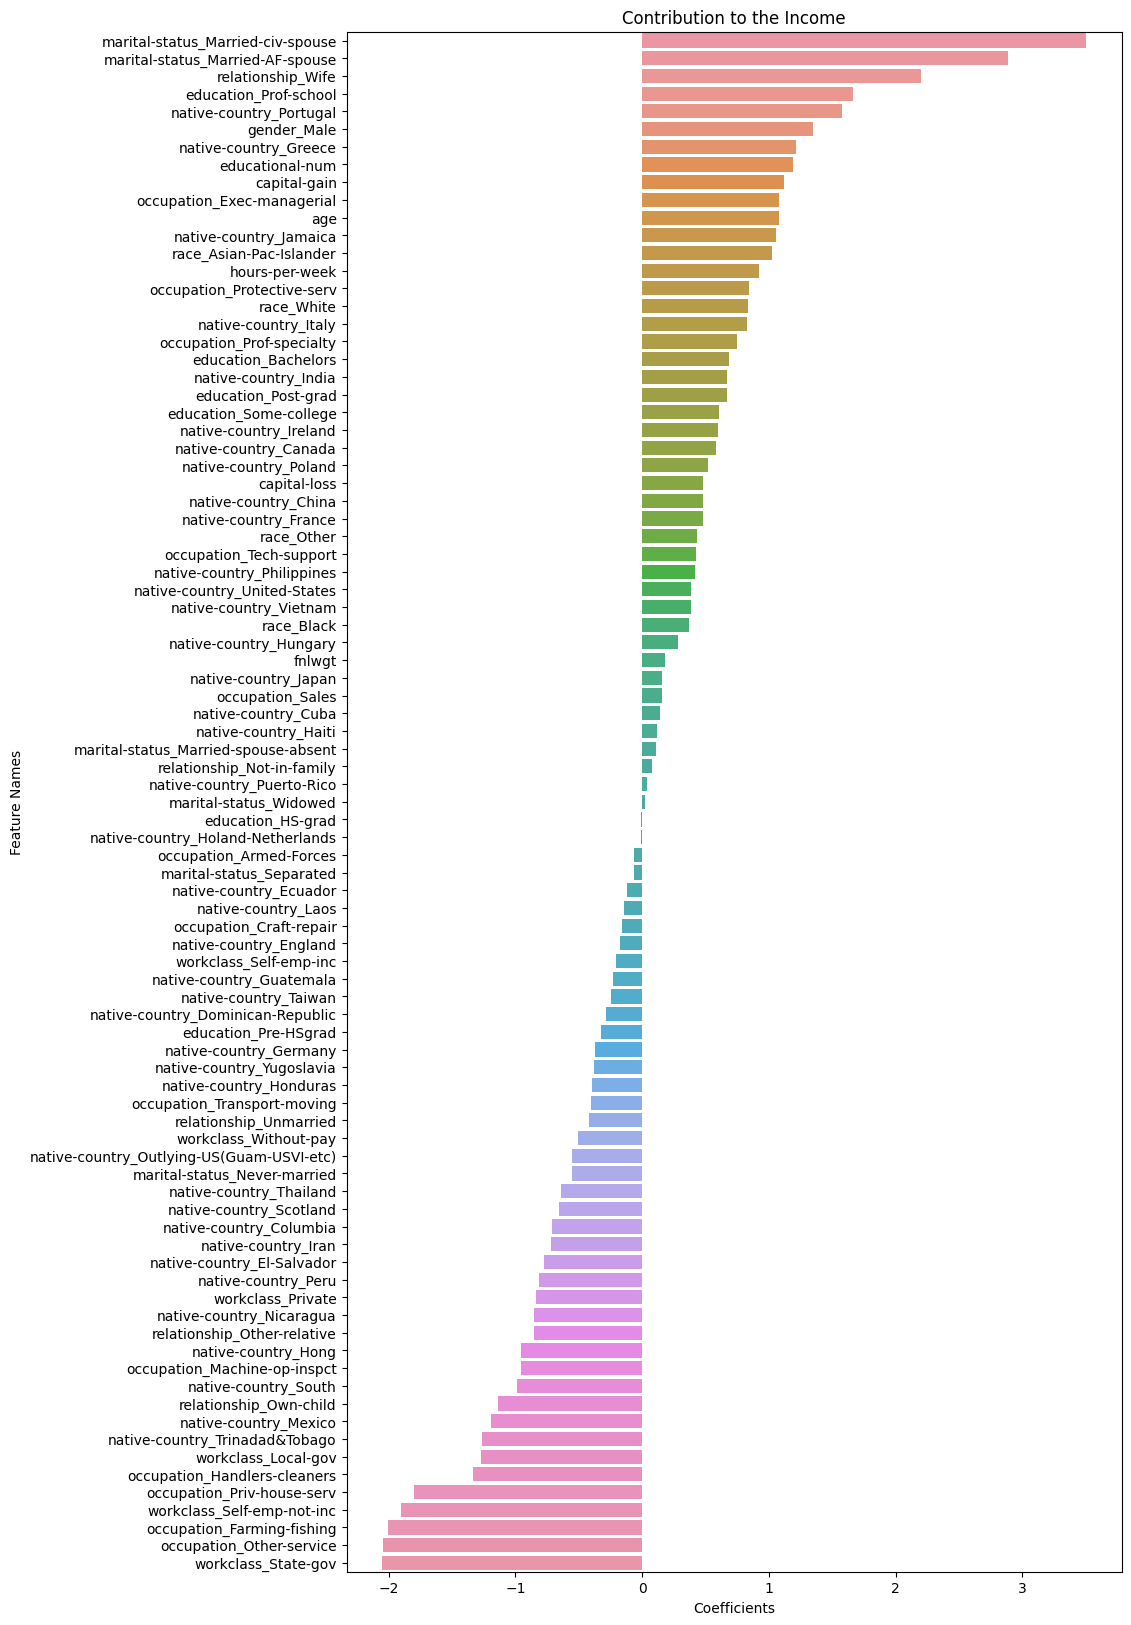

In [84]:
plt.figure(figsize=(10, 20))
sns.barplot(x='feature_importance', y='feature_names', data=df_importance)
plt.title('Contribution to the Income')
plt.xlabel('Coefficients')
plt.ylabel('Feature Names')
plt.savefig("../Images/IMB-cm-test.png")
plt.show()